In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Optimal f: 3.0713828029683845
Time at peak (s=1): 3.043043043043043


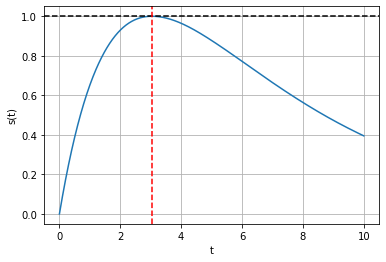

In [3]:
def dxdt(t,x,tau_r,tau_f):
    a = x[0]
    b = x[1]
    return [ -a/tau_r, -b/tau_f]

t0 = 0
tfinal = 10
dt = 0.01
t = np.linspace(0, tfinal, 1000)


f = 3.0713828029683845 #Found to be correct value
x0 = [f,f]
    
sol = solve_ivp(dxdt,[t0,tfinal],x0,args=(2,5),dense_output=True)
    
a = sol.sol(t)[0]
b = sol.sol(t)[1]

s = b - a

plt.plot(t,s)
plt.ylabel('s(t)')
plt.xlabel('t')
plt.grid(True)
plt.axhline(1, color='k', linestyle='--', label='y=1')
plt.axvline(3.043043043043043, color='r', linestyle='--', label='y=1')
print(f'Optimal f: {3.0713828029683845}') #Found in other code
print(f'Time at peak (s=1): {3.043043043043043}') #Found in other code

In [4]:
tau_s = 10 # Vary this

def dxdt_new(t, x, tau_s):
    s = x[0]
    p = x[1]
    dsdt = -s/tau_s + p/tau_s
    dpdt = -p/tau_s
    return [dsdt, dpdt]

t0 = 0
tfinal = 10
dt = 0.01

t = np.linspace(t0, tfinal, 1000)

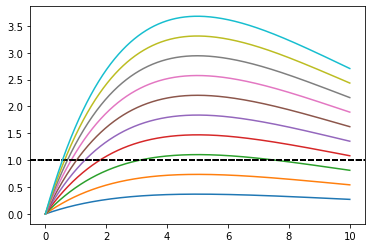

In [5]:
for f in np.linspace(1,10,10):
    
    x0 = [0,f]
    
    sol = solve_ivp(dxdt_new,[t0,tfinal],x0,args=(5,),dense_output=True)
    
    s = sol.sol(t)[0]
    p = sol.sol(t)[1]

    plt.axhline(1, color='k', linestyle='--', label='y=1')

    plt.plot(t,s)

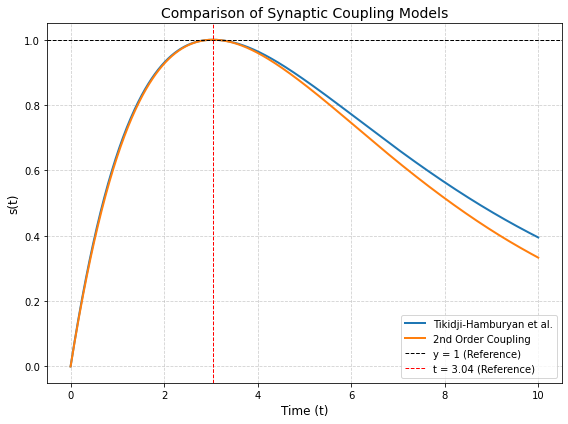

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the first-order differential equations for the "Paper" model
def dxdt(t, x, tau_r, tau_f):
    a, b = x
    return [-a / tau_r, -b / tau_f]

# Define the second-order differential equations for the "2nd Order Coupling" model
def dxdt_new(t, x, tau_s):
    s, p = x
    dsdt = -s / 3.04 + p / 3.04
    dpdt = -p / 3.04
    return [dsdt, dpdt]

# Set up parameters and initial conditions for the "Paper" model
t0, tfinal, dt = 0, 10, 0.01
t = np.linspace(t0, tfinal, 1000)

f = 3.0713828029683845  # Found to be correct value
x0_paper = [f, f]

# Solve the "Paper" model
sol_paper = solve_ivp(dxdt, [t0, tfinal], x0_paper, args=(2, 5), dense_output=True)
a_paper = sol_paper.sol(t)[0]
b_paper = sol_paper.sol(t)[1]
s_paper = b_paper - a_paper

# Set up parameters and initial conditions for the "2nd Order Coupling" model
x0_2nd_order = [0, 2.7185823035951033]  # Obtained value

# Solve the "2nd Order Coupling" model
sol_2nd_order = solve_ivp(dxdt_new, [t0, tfinal], x0_2nd_order, args=(5,), dense_output=True)
s_2nd_order = sol_2nd_order.sol(t)[0]

# Create the plot
plt.figure(figsize=(8, 6))

# Plot "Paper" model
plt.plot(t, s_paper, label='Tikidji-Hamburyan et al.', linewidth=2)

# Plot "2nd Order Coupling" model
plt.plot(t, s_2nd_order, label='2nd Order Coupling',  linewidth=2)

# Add horizontal and vertical reference lines
plt.axhline(1, color='k', linestyle='--', linewidth=1, label='y = 1 (Reference)')
plt.axvline(3.043043043043043, color='r', linestyle='--', linewidth=1, label='t = 3.04 (Reference)', )

# Label axes and add title
plt.xlabel('Time (t)', fontsize=12)
plt.ylabel('s(t)', fontsize=12)
plt.title('Comparison of Synaptic Coupling Models', fontsize=14)

# Add grid, legend, and customize ticks
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('SynapticModels.png')
# Show the finalized plot
plt.tight_layout()
plt.show()


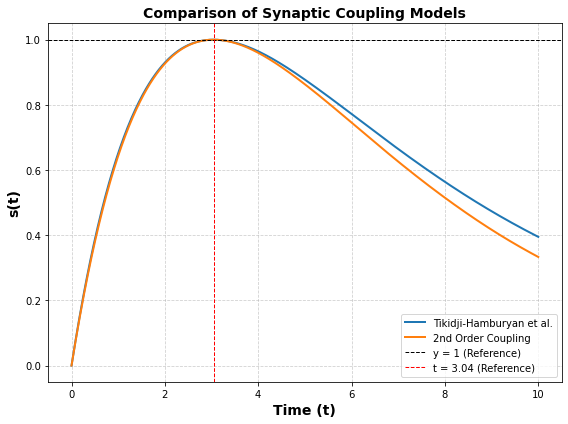

In [12]:
# Create the plot with updated axis label formatting
plt.figure(figsize=(8, 6))

# Plot "Paper" model
plt.plot(t, s_paper, label='Tikidji-Hamburyan et al.', linewidth=2)

# Plot "2nd Order Coupling" model
plt.plot(t, s_2nd_order, label='2nd Order Coupling', linewidth=2)

# Add horizontal and vertical reference lines
plt.axhline(1, color='k', linestyle='--', linewidth=1, label='y = 1 (Reference)')
plt.axvline(3.043043043043043, color='r', linestyle='--', linewidth=1, label='t = 3.04 (Reference)')

# Label axes with larger, bold font
plt.xlabel('Time (t)', fontsize=14, fontweight='bold')
plt.ylabel('s(t)', fontsize=14, fontweight='bold')
plt.title('Comparison of Synaptic Coupling Models', fontsize=14, fontweight = 'bold')

# Add grid, legend, and customize ticks
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Save the plot
plt.savefig('SynapticModels.png')

# Show the finalized plot
plt.tight_layout()
plt.show()


s(3.04) for the first system: 0.9999999999999994
s(3.04) for the second system: 1.0000235249246123


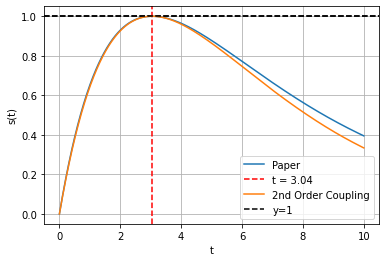

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# First system
def dxdt(t, x, tau_r, tau_f):
    a = x[0]
    b = x[1]
    return [-a / tau_r, -b / tau_f]

t0 = 0
tfinal = 10
dt = 0.01
t = np.linspace(0, tfinal, 1000)

f = 3.0713828029683845  # Found to be correct value
x0 = [f, f]

sol1 = solve_ivp(dxdt, [t0, tfinal], x0, args=(2, 5), dense_output=True)

a = sol1.sol(t)[0]
b = sol1.sol(t)[1]

s1 = b - a

# Calculate s(4.03) for the first system
s1_at_4_03 = sol1.sol(3.043043043043043)[1] - sol1.sol(3.043043043043043)[0]
print(f"s(3.04) for the first system: {s1_at_4_03}")

# Plot for the first system
plt.plot(t, s1, label='Paper')
plt.ylabel('s(t)')
plt.xlabel('t')
plt.grid(True)
plt.axhline(1, color='k', linestyle='--')
plt.axvline(3.043043043043043, color='r', linestyle='--', label='t = 3.04')

# Second system
def dxdt_new(t, x, tau_s):
    s = x[0]
    p = x[1]
    dsdt = -s / 3.043043043043043 + p / 3.043043043043043
    dpdt = -p / 3.043043043043043
    return [dsdt, dpdt]

x0_new = [0, 2.7185823035951033]  # Obtained

sol2 = solve_ivp(dxdt_new, [t0, tfinal], x0_new, args=(5,), dense_output=True)

s2 = sol2.sol(t)[0]

# Calculate s(4.03) for the second system
s2_at_4_03 = sol2.sol(3.043043043043043)[0]
print(f"s(3.04) for the second system: {s2_at_4_03}")

# Plot for the second system
plt.plot(t, s2, label='2nd Order Coupling')
plt.axhline(1, color='k', linestyle='--', label='y=1')
plt.legend()
plt.show()
